In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!cp "/content/drive/MyDrive/Dacon/data/train.csv" "/content/data/train.csv"
!cp "/content/drive/MyDrive/Dacon/data/test.csv" "/content/data/test.csv"
!cp "/content/drive/MyDrive/Dacon/data/sample_submission.csv" "/content/data/sample_submission.csv"

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/data/train.csv")
test = pd.read_csv("/content/data/test.csv")
sample_submission = pd.read_csv("/content/data/sample_submission.csv")

In [ ]:
train.shape

(26457, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# 두 dataframe 합치기
data = pd.concat([train, test], axis=0)

In [ ]:
# 결측치 찾기
# 결측치의 개수 구하기
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
# train에는 credit에 null값이 없지만 위 값을 봤을 때 두 데이터프레임을 합치면서 결측치가 생김
train['credit'].isnull().sum()

0

In [ ]:
# occyp_type 열 없애기
data = data.drop('occyp_type', axis=1)

In [ ]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
# gender의 요소의 개수 count해줌
len(data['gender'].unique())

2

In [ ]:
# 모든 열의 요소 개수 count
unique_len = data.apply(lambda x: len(x.unique()))

In [ ]:
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

1. 2개 이하
2. 2개 초과 10개 이하
3. 10개 초과

In [ ]:
# 요소의 개수가 2개 이하인 column을 뽑아 그룹을 만듦
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [ ]:
group_2 = unique_len[(unique_len > 2) & (unique_len <= 10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [ ]:
group_3 = unique_len[unique_len > 10].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [ ]:
# 문자로 되어있는 요소를 숫자로 변경해줌
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
data['gender'] = data['gender'].replace(['F', 'M'], [0, 1])

In [ ]:
data['gender']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: gender, Length: 36457, dtype: int64

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,N,N,1,0,0,0
1,0,N,Y,1,0,0,1
2,1,Y,Y,1,0,1,0
3,0,N,Y,1,0,1,0
4,0,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,Y,Y,1,1,1,0
9996,1,Y,Y,1,1,0,0
9997,0,N,Y,1,0,0,0
9998,0,Y,N,1,0,1,0


In [ ]:
data['car'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])

In [ ]:
data['reality'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['reality'] = data['reality'].replace(['N', 'Y'], [0, 1])

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


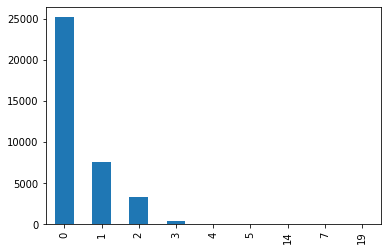

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
# 2보다 큰 값이 거의 없으므로 이상치로 판단하고 제거하는 전처리
# 2보다 큰 값을 2로 바꿔줌

data.loc[data['child_num'] > 2, 'child_num'] = 2

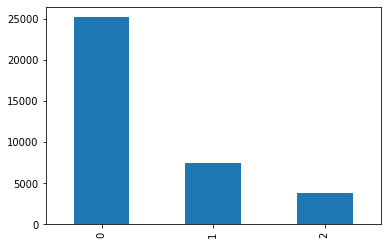

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data[group_2].apply(lambda x: len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
# 문자형 변수를 숫자형 변수로 인코딩 해주는 변수
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
# 0부터 4까지 unique한 변수로 바뀜 0부터 4까지 unique한 변수로 바뀜
set(label_encoder.fit_transform(data['income_type']))
set(label_encoder.fit_transform(data['income_type']))

{0, 1, 2, 3, 4}

In [ ]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


In [ ]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [ ]:
data['income_total'].min()

27000.0

In [ ]:
data['income_total'].max()

1575000.0

In [ ]:
len(data['income_total'].unique())

265

In [ ]:
# 각 연속형 변수들을 구간화한다.
import numpy as np

In [ ]:
# income_total 변수를 7개의 구간으로 나누고 저장한다.
counts, bin_dividers = np.histogram(data['income_total'], bins = 7)

In [ ]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

In [ ]:
# 각각의 실수값이 어느 구간에 해당하는지 인코딩됨 각각의 실수값이 어느 구간에 해당하는지 인코딩됨
# labels를 이용해 각 구간을 간단하게 표현가능
# 옵션 중 include_lowesr = True 를 이용해 각 구간을 나누는 분점점이 바뀜 
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest=True, labels = [i for i in range(7)]))[0]

In [ ]:
# income_total이 int64형태로 변환됨
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [ ]:
data['DAYS_BIRTH']

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [ ]:
# 위 과정을 함수로 작성해 3개의 column을 한번에 구간화한다.

def make_bin(array, n):
  array = - array
  _, bin_dividers = np.histogram(array, bins = n)
  cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
  bined_array = pd.factorize(cut_categories)[0]
  return bined_array

In [ ]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [ ]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 10)
data['begin_month'] = make_bin(data['begin_month'], 10)

In [ ]:
# 구간화 완성된 모습 구간화 완성된 모습
data[group_3]
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,3
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,8
9997,36454,1,8,0,6
9998,36455,0,4,0,8


In [ ]:
## train set 분할하기

In [ ]:
train.shape

(26457, 20)

In [ ]:
test.shape

(10000, 19)

In [ ]:
train = data[:-10000]

In [ ]:
test = data[-10000:]

In [ ]:
# credit 열을 제거한 것 credit 열을 제거한 것
train_x = train.drop('credit', axis=1)

In [ ]:
# credit 열
train_y =train['credit']

In [ ]:
test_x = test.drop('credit', axis=1)

In [ ]:
train_x.shape

(26457, 18)

In [ ]:
train_y.shape

(26457,)

In [ ]:
test_x.shape

(10000, 18)

In [ ]:
## randomforest classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
# fit을 이용해 학습 가능하다
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# train_y에 대한 예측확률이 도출됨
# 두번째 열에 있는 0.79가 가장 높은 예측확률이다.

train_proba = clf.predict_proba(train_x)

In [ ]:
train_proba[:10]

array([[0.15, 0.71, 0.14],
       [0.05, 0.71, 0.24],
       [0.04, 0.08, 0.88],
       [0.79, 0.03, 0.18],
       [0.04, 0.1 , 0.86],
       [0.08, 0.7 , 0.22],
       [0.05, 0.08, 0.87],
       [0.72, 0.07, 0.21],
       [0.08, 0.02, 0.9 ],
       [0.06, 0.06, 0.88]])

In [ ]:
# row값이 가장 큰 column을 찾는다.
# 모델이 예측한 train_y에 대한 값

np.argmax(train_proba, axis=1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2])

In [ ]:
# 지금까지는 train_x에 대한 예측값을 구했고,
# 이제 test_x에 대한 예측값을 구해 제출하면된다.

In [ ]:
clf.predict_proba(test_x)

array([[0.02, 0.26, 0.72],
       [0.17, 0.31, 0.52],
       [0.11, 0.17, 0.72],
       ...,
       [0.04, 0.17, 0.79],
       [0.15, 0.39, 0.46],
       [0.08, 0.19, 0.73]])

In [ ]:
# sample_submission에 우리가 예측한 값을 넣어줌
sample_submission.iloc[:,1:] = clf.predict_proba(test_x)

In [ ]:
sample_submission

,index,0,1,2
0,26457,0.02,0.26,0.72
1,26458,0.17,0.31,0.52
2,26459,0.11,0.17,0.72
3,26460,0.13,0.37,0.50
4,26461,0.05,0.23,0.72
...,...,...,...,...
9995,36452,0.12,0.27,0.61
9996,36453,0.14,0.31,0.55
9997,36454,0.04,0.17,0.79
9998,36455,0.15,0.39,0.46


In [ ]:
# 2번째 제출파일 완성
sample_submission.to_csv('sample_submission_ver1.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                 stratify = train_y, # train_y에 있는 요소별 비율을 고려해 검증set과 훈련set 분할
                 test_size = 0.25, # 전체 data의 25%를 검증에 사용, 75%를 학습에 사용
                 random_state = 10086 # 복원을 용이하게 함
                 )

In [ ]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# 실제 y_val에 대한 예측확률
# 각 class에 해당하는 확률을 예측한 값
# X_val에 0번 째 row대한 실제 예측값이 0일 확률이 7%
# X_val에 1번 째 row대한 실제 예측값이 0일 확률이 43%
# X_val에 2번 째 row대한 실제 예측값이 0일 확률이 50%
# => 가장 그럴 듯한 것은 2이다.

y_proba = clf.predict_proba(X_val)

In [ ]:
y_val_onehot = pd.get_dummies(y_val)

In [ ]:
y_proba

array([[0.11, 0.36, 0.53],
       [0.01, 0.05, 0.94],
       [0.29, 0.06, 0.65],
       ...,
       [0.08, 0.03, 0.89],
       [0.1 , 0.28, 0.62],
       [0.11, 0.12, 0.77]])

In [ ]:
y_val_onehot

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [ ]:
# y_proba가 얼마나 y_val_onehot encoding된 값에 잘 맞는지 확인

from sklearn.metrics import log_loss

In [ ]:
# 학습set으로 학습된 모델의 검증set이 log_loss로 0.92가 나온 것을 알 수 있다.
log_loss(y_val_onehot, y_proba)

0.9389132978982813

In [ ]:
## k-fold crossvalidation

from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

In [ ]:
# train_x 와 train_y를 적절히 분할하여 train index를 반환
# 해당 fold가 몇번째 fold를 돌고있는건지 보기위해 n_fold를 만들어줌
# X_train과 y_train으로 학습하고, X_val에 대한 추론값을 도출

outcomes = []
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val) # 세 개의 value에 대한 onehot encoding을 구함

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

np.mean(outcomes)

0.932928775377472

In [ ]:
# 학습에 사용하는 80%의 index가 첫번째 튜플에 있고,
# 검증에 사용하는 20%의 index가 두번째 튜플에 있다.
# 80%, 20% 로 나뉜줄 어떻게 알 지?
train_index, val_index = index

In [ ]:
# k-fold crossvalidation score
np.mean(outcomes)

0.932928775377472

In [ ]:
outcomes = []
sub = np.zeros((test_x.shape[0], 3))
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5
np.mean(outcomes)

0.9347228703234822

In [ ]:
# fold 별 추론값의 평균값을 구할 수 있다.
sub

array([[0.068, 0.216, 0.716],
       [0.108, 0.31 , 0.582],
       [0.104, 0.222, 0.674],
       ...,
       [0.058, 0.2  , 0.742],
       [0.17 , 0.286, 0.544],
       [0.082, 0.208, 0.71 ]])

In [ ]:
sample_submission.iloc[:, 1:] = sub

In [ ]:
# 각 class별 test의 예측값에 대한 다섯개의 fold의 평균값을 추론한 값 각 class별 test의 예측값에 대한 다섯개의 fold의 평균값을 추론한 값
sample_submission.to_csv("5fold_prediction.csv", index = False)
sample_submission

,index,0,1,2
0,26457,0.068,0.216,0.716
1,26458,0.108,0.310,0.582
2,26459,0.104,0.222,0.674
3,26460,0.130,0.286,0.584
4,26461,0.056,0.290,0.654
...,...,...,...,...
9995,36452,0.114,0.324,0.562
9996,36453,0.140,0.330,0.530
9997,36454,0.058,0.200,0.742
9998,36455,0.170,0.286,0.544
